In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv('/content/drive/MyDrive/OHCA.csv')#retrieve dataset from the google drive

In [ ]:
df['output'] = df['output'].replace([1, 2, 3, 4], 1)
df = df.drop(columns=['thal', 'ca'])

# Assuming df is your DataFrame containing the dataset
label_counts = df['output'].value_counts()

# Print the count of each label
print("Label Counts:")
print(label_counts)

Label Counts:
output
1    509
0    411
Name: count, dtype: int64


In [ ]:
# Identify rows containing "?"
rows_with_question_mark = df[df.apply(lambda row: any('?' in str(value) for value in row), axis=1)]

# Display the count and the rows containing "?"
print("Number of rows containing '?':", len(rows_with_question_mark))
print("Rows containing '?' details:\n", rows_with_question_mark)

# Remove rows containing "?"
df_cleaned = df[~df.apply(lambda row: any('?' in str(value) for value in row), axis=1)]

# Display the shape of the cleaned DataFrame
print("Shape of the cleaned DataFrame:", df_cleaned.shape)

Number of rows containing '?': 389
Rows containing '?' details:
       age  sex   cp trestbps chol fbs restecg thalach exang oldpeak slope  \
303  28.0  1.0  2.0      130  132   0       2     185     0     0.0     ?   
304  29.0  1.0  2.0      120  243   0       0     160     0     0.0     ?   
305  29.0  1.0  2.0      140    ?   0       0     170     0     0.0     ?   
306  30.0  0.0  1.0      170  237   0       1     170     0     0.0     ?   
307  31.0  0.0  2.0      100  219   0       1     150     0     0.0     ?   
..    ...  ...  ...      ...  ...  ..     ...     ...   ...     ...   ...   
915  54.0  0.0  4.0      127  333   1       1     154     0       0     ?   
916  62.0  1.0  1.0        ?  139   0       1       ?     ?       ?     ?   
917  55.0  1.0  4.0      122  223   1       1     100     0       0     ?   
918  58.0  1.0  4.0        ?  385   1       2       ?     ?       ?     ?   
919  62.0  1.0  2.0      120  254   0       2      93     1       0     ?   

     outpu

In [ ]:

# Replace '?' with NaN
df.replace(['?'], np.nan, inplace=True)

# List of categorical columns
categorical_columns = ['fbs', 'restecg', 'exang', 'slope']

# List of numeric columns
numeric_columns = ['trestbps', 'chol', 'thalach', 'oldpeak']

# Replace missing values in categorical columns with mode
for column in categorical_columns:
    mode_value = df[column].mode().iloc[0]
    df[column].fillna(mode_value, inplace=True)

# Replace missing values in numeric columns with mean
for column in numeric_columns:
    mean_value = df[column].astype(float).mean()  # Convert to float before calculating mean
    df[column].fillna(mean_value, inplace=True)

# Display the cleaned DataFrame
print("Cleaned DataFrame:\n", df)


Cleaned DataFrame:
       age  sex   cp    trestbps   chol  fbs restecg     thalach exang  \
0    63.0  1.0  1.0       145.0  233.0  1.0     2.0       150.0   0.0   
1    67.0  1.0  4.0       160.0  286.0  0.0     2.0       108.0   1.0   
2    67.0  1.0  4.0       120.0  229.0  0.0     2.0       129.0   1.0   
3    37.0  1.0  3.0       130.0  250.0  0.0     0.0       187.0   0.0   
4    41.0  0.0  2.0       130.0  204.0  0.0     2.0       172.0   0.0   
..    ...  ...  ...         ...    ...  ...     ...         ...   ...   
915  54.0  0.0  4.0         127    333    1       1         154     0   
916  62.0  1.0  1.0  132.132404    139    0       1  137.545665     0   
917  55.0  1.0  4.0         122    223    1       1         100     0   
918  58.0  1.0  4.0  132.132404    385    1       2  137.545665     0   
919  62.0  1.0  2.0         120    254    0       2          93     1   

      oldpeak slope  output  
0         2.3   3.0       0  
1         1.5   2.0       1  
2         2.6

In [ ]:
# List of columns with mixed data types
columns_to_convert = ['age', 'sex', 'chol', 'thalach', 'trestbps', 'cp', 'fbs', 'restecg', 'exang', 'slope']

# Convert columns with mixed data types to integers
for column in columns_to_convert:
    df[column] = df[column].apply(lambda x: int(float(x)) if isinstance(x, str) else int(x))

# List of columns to convert to float
columns_to_convert_float = ['oldpeak']

# Convert 'oldpeak' column to float
for column in columns_to_convert_float:
    df[column] = df[column].astype(float)

df.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,output
0,63,1,1,145,233,1,2,150,0,2.3,3,0
1,67,1,4,160,286,0,2,108,1,1.5,2,1
2,67,1,4,120,229,0,2,129,1,2.6,2,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0
6,62,0,4,140,268,0,2,160,0,3.6,3,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1
9,53,1,4,140,203,1,2,155,1,3.1,3,1


In [ ]:
# Identify duplicate rows
duplicate_mask = df.duplicated()
duplicate_rows = df[duplicate_mask]

# Display duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
405   49    0   2       110   199    0        0      160      0      0.0   
907   58    1   3       150   219    0        1      118      1      0.0   

     slope  output  
405      2       0  
907      2       1  


In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()

# Check the shape of the DataFrame after removing duplicates
print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (918, 12)


In [ ]:
from imblearn.over_sampling import SMOTE
# Assuming you have a dataset stored in a variable df
# Extract features X and target variable y from the dataset
X = df.drop(columns=['output'])  # Features
y = df['output']  # Target variable

# Save the indices of the original dataset
original_indices = X.index

# Apply SMOTE to balance the entire dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Get the indices of the resampled dataset
resampled_indices = X_resampled.index

# Get the indices of the synthetic samples (those not present in the original dataset)
synthetic_indices = resampled_indices.difference(original_indices)

# Print the class distribution before and after SMOTE
print("Class distribution before SMOTE:")
print(y.value_counts())
print("\nClass distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

# Print the indices of the synthetic samples
print("\nIndices of synthetic samples:")
print(synthetic_indices)


Class distribution before SMOTE:
output
1    508
0    410
Name: count, dtype: int64

Class distribution after SMOTE:
output
0    508
1    508
Name: count, dtype: int64

Indices of synthetic samples:
Index([ 405,  907,  920,  921,  922,  923,  924,  925,  926,  927,  928,  929,
        930,  931,  932,  933,  934,  935,  936,  937,  938,  939,  940,  941,
        942,  943,  944,  945,  946,  947,  948,  949,  950,  951,  952,  953,
        954,  955,  956,  957,  958,  959,  960,  961,  962,  963,  964,  965,
        966,  967,  968,  969,  970,  971,  972,  973,  974,  975,  976,  977,
        978,  979,  980,  981,  982,  983,  984,  985,  986,  987,  988,  989,
        990,  991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
       1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013,
       1014, 1015],
      dtype='int64')


In [ ]:
import pandas as pd

# Assuming X_resampled and y_resampled contain the resampled features and target variable
# Create a DataFrame for the resampled data
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['output'] = y_resampled

# Extract the indices of the synthetic samples
synthetic_indices = resampled_indices.difference(original_indices)

# Create a DataFrame for the synthetic samples
synthetic_df = resampled_df.loc[synthetic_indices]

# Concatenate the original DataFrame with the synthetic DataFrame
combined_df = pd.concat([df, synthetic_df], axis=0)

# Now combined_df contains both the original and synthetic samples
print("Combined DataFrame:")
print(combined_df.head())

# Assuming df is your DataFrame containing the dataset
label_counts = combined_df['output'].value_counts()

# Print the count of each label
print("Label Counts:")
print(label_counts)


Combined DataFrame:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

   output  
0       0  
1       1  
2       1  
3       0  
4       0  
Label Counts:
output
0    508
1    508
Name: count, dtype: int64


Training Features Shape: (711, 11)
Testing Features Shape: (305, 11)
Training Labels Shape: (711,)
Testing Labels Shape: (305,)
------------------------------------------------

XGBoost Model Metrics:
Training Accuracy: 87.90%
Training Error: 12.10%
Test Accuracy: 83.93%
Testing Error: 16.07%


True Positives (TP): 132
True Negatives (TN): 124
False Positives (FP): 26
False Negatives (FN): 23

Precision: 0.8354430379746836
Recall: 0.8516129032258064
F1-Score: 0.8434504792332268

Confusion Matrix:
            cardiac  no cardiac
cardiac         132          23
no cardiac       26         124


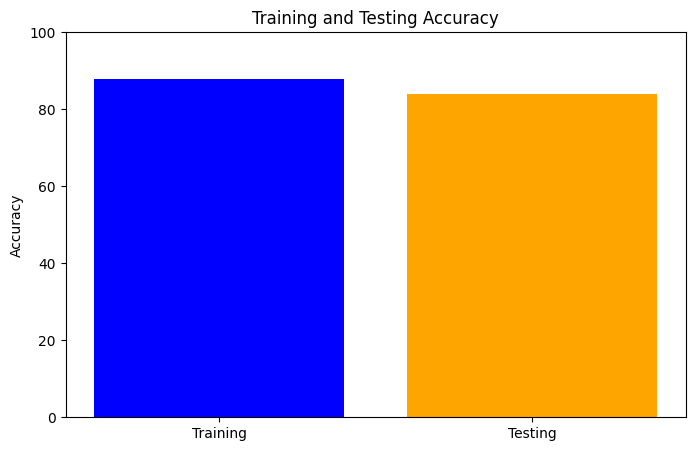


Sample 1: Probabilities - Class 0: 0.0542, Class 1: 0.9458, Prediction: 1
Sample 2: Probabilities - Class 0: 0.8502, Class 1: 0.1498, Prediction: 0
Sample 3: Probabilities - Class 0: 0.3174, Class 1: 0.6826, Prediction: 1
Sample 4: Probabilities - Class 0: 0.0429, Class 1: 0.9571, Prediction: 1
Sample 5: Probabilities - Class 0: 0.3512, Class 1: 0.6488, Prediction: 1
Sample 6: Probabilities - Class 0: 0.0404, Class 1: 0.9596, Prediction: 1
Sample 7: Probabilities - Class 0: 0.9636, Class 1: 0.0364, Prediction: 0
Sample 8: Probabilities - Class 0: 0.2279, Class 1: 0.7721, Prediction: 1
Sample 9: Probabilities - Class 0: 0.7153, Class 1: 0.2847, Prediction: 0
Sample 10: Probabilities - Class 0: 0.5585, Class 1: 0.4415, Prediction: 0
Sample 11: Probabilities - Class 0: 0.0589, Class 1: 0.9411, Prediction: 1
Sample 12: Probabilities - Class 0: 0.5788, Class 1: 0.4212, Prediction: 0
Sample 13: Probabilities - Class 0: 0.3237, Class 1: 0.6763, Prediction: 1
Sample 14: Probabilities - Class 

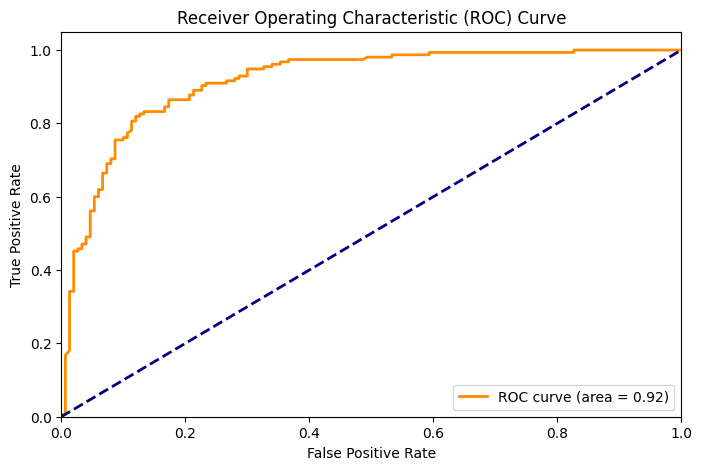

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Split the dataset into training and testing sets
X = combined_df.drop(columns=['output'])  # Features
y = combined_df['output']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

# Step 2: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Create the XGB model
xgb_model = XGBClassifier(random_state=0)
'''
# Step 4-7: Hyperparameter tuning
xgb_model.set_params(
    n_estimators=200,
    learning_rate=0.2,
    max_depth=9,
    min_child_weight=19
)'''

# Step 4-7: Hyperparameter tuning
xgb_model.set_params(
    n_estimators=23,
    learning_rate=0.2,
    max_depth=4,
    min_child_weight=5
)

# Step 8: Train and test the XGB model
xgb_model.fit(X_train_scaled, y_train)
y_train_pred = xgb_model.predict(X_train_scaled)
y_test_pred = xgb_model.predict(X_test_scaled)


# Evaluate the model
accuracy_train = accuracy_score(y_train, y_train_pred) * 100
accuracy_test = accuracy_score(y_test, y_test_pred) * 100
error_train = 100 - accuracy_train
error_test = 100 - accuracy_test
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics
print("------------------------------------------------")
print("\nXGBoost Model Metrics:")
print("Training Accuracy: {:.2f}%".format(accuracy_train))
print("Training Error: {:.2f}%".format(error_train))
print("Test Accuracy: {:.2f}%".format(accuracy_test))
print("Testing Error: {:.2f}%\n".format(error_test))

# Define class labels
class_labels = ["no cardiac", "cardiac"]

# Create the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Extract TP, TN, FP, FN counts
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Calculate precision, recall, and F1 score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Display the counts
print("\nTrue Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

# Display precision, recall, and F1 score
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Display the confusion matrix
cm_df = pd.DataFrame(conf_matrix[::-1, ::-1], index=class_labels[::-1], columns=class_labels[::-1])
print("\nConfusion Matrix:")
print(cm_df)

# Plotting the accuracy
plt.figure(figsize=(8, 5))
plt.bar([1, 2], [accuracy_train, accuracy_test], color=['blue', 'orange'])
plt.title('Training and Testing Accuracy')
plt.xticks([1, 2], ['Training', 'Testing'])
plt.ylabel('Accuracy')
plt.ylim(0, 100)  # Assuming accuracy is between 0 and 100
plt.show()

# Predict probabilities on the test set
probabilities = xgb_model.predict_proba(X_test_scaled)

# Set the threshold
threshold = 0.5

# Apply the threshold to convert probabilities to binary predictions
binary_predictions = (probabilities[:, 1] >= threshold).astype(int)
print()

# Display the probabilities and binary predictions for all samples
for i in range(len(probabilities)):
    print(f"Sample {i + 1}: Probabilities - Class 0: {probabilities[i, 0]:.4f}, Class 1: {probabilities[i, 1]:.4f}, Prediction: {binary_predictions[i]}")

print()
# Calculate TP, TN, FP, FN based on binary predictions for all samples
binary_conf_matrix_all = confusion_matrix(y_test, binary_predictions)

# Extract TP, TN, FP, FN counts
TN_binary_all = binary_conf_matrix_all[0, 0]
FP_binary_all = binary_conf_matrix_all[0, 1]
FN_binary_all = binary_conf_matrix_all[1, 0]
TP_binary_all = binary_conf_matrix_all[1, 1]

# Display TP, TN, FP, FN for all samples
print("\nBinary Confusion Matrix for All Samples:")
print(f"True Positives (TP): {TP_binary_all}")
print(f"True Negatives (TN): {TN_binary_all}")
print(f"False Positives (FP): {FP_binary_all}")
print(f"False Negatives (FN): {FN_binary_all}")

# Calculate precision, recall, and F1 score for all samples
precision_binary_all = TP_binary_all / (TP_binary_all + FP_binary_all)
recall_binary_all = TP_binary_all / (TP_binary_all + FN_binary_all)
f1_score_binary_all = 2 * (precision_binary_all * recall_binary_all) / (precision_binary_all + recall_binary_all)

# Display precision, recall, and F1 score for all samples
print("\nPerformance Metrics for All Samples:")
print(f"Precision: {precision_binary_all:.4f}")
print(f"Recall: {recall_binary_all:.4f}")
print(f"F1 Score: {f1_score_binary_all:.4f}")

#Calculate AUC and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
print("")
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import os
import joblib

# Define the directory path
directory = '/content/gdrive/MyDrive/MyModels/'

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the trained XGBoost model to Google Drive
joblib.dump(xgb_model, directory + 'xgb_model_latest_new.pkl')


['/content/gdrive/MyDrive/MyModels/xgb_model_latest_new.pkl']